# 퍼셉트론

## Yes

## 2번 : 각 입력신호마다 다른 가중치값을 가집니다.

## Yes

## 4번 : 퍼셉트론의 최종 결과값은 입력변수와 가중치의 가중합에 편향을 더한 값으로 나옵니다.  편향이 크면 퍼셉트론이 활성화되기 어려우며 편향이 작으면 퍼셉트론이 활성화되기 쉬워집니다.

## 4번 : XOR gate는 비선형적으로 분리가 가능합니다.

## 3번 : 단층 퍼셉트론은 선형 영역으로 결과를 분리할 수 있습니다.

## 퍼셉트론의 식은 아래와 같을 때, 논리회로 문제(AND, NAND, OR, XOR)를 해결하시오
퍼셉트론 구현  
$y = \big\{^{0 = w_1 * x_1 + w_2 * x_2 <= \theta}_{1 = w_1 * x_1 + w_2 * x_2 > \theta}$
$x_i$는 입력신호,  
$w_i$는 가중치,  
$y$는 출력신호 입니다.  
$\theta$는 임계값 입니다.  
$b$는 편향 입니다.

책에서는 데이터가 하나씩 들어오는 경우입니다. 이번 문제에서는 x를 하나의 행렬로 넣어서 만드는 경우를 생각해보겠습니다.

In [3]:
import numpy as np
# 입력신호 x가 아래와 같을때, 출력신호가 되도록 하는 가중치 w를 찾으시오.
x = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]])

### AND gate

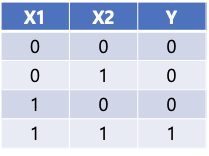
W1 = 0.5,  
W2 = 0.5,  
b = -0.7일 때,  
```enumerate()```는 위치값과 위치에 해당하는 값을 동시에 출력해주는 함수 입니다.  
```np.dot()```은 2차원의 행렬의 경우 행렬곱을 시켜주는 함수 입니다.

In [36]:
# np.dot() 예시
a = np.array([
    [1, 2],
    [3, 4]])
b = np.array([
    [3, 0],
    [0,3]])
print(np.dot(a,b))

[[ 3  6]
 [ 9 12]]


In [37]:
# enumerates() 예시
names = ["김","박","이"]
for ind, name in enumerate(names):
    print(ind, name)

0 김
1 박
2 이


아래의 함수를 완성하시오.

In [1]:
# x를 넣으면 y의 결과는 [0,0,0,1]이 나와야 합니다.
def AND(x):
    w = np.array([0.5, 0.5])
    b = -0.7
    y = np.dot(x,w) + b
    for ind, theta in enumerate(y):
        if theta <= 0:
            y[ind] = 0
        elif theta > 0:
            y[ind] = 1
    return y

In [4]:
AND(x)

array([0., 0., 0., 1.])

### NAND gate

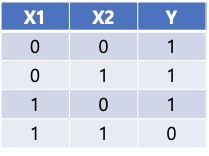
y의 결과가 [1,1,1,0]이 나오는 매개변수 w와 b를 찾으시오.

In [5]:
# x를 넣으면 y의 결과는 [1,1,1,0]이 나와야 합니다.
def NAND(x):
    w = np.array([-0.5,-0.5]) 
    b = 0.7 
    y = np.dot(x,w) + b  
    for ind, tmp in enumerate(y):
        if tmp <= 0:
            y[ind] = 0
        elif tmp > 0:
            y[ind] = 1
    return y

In [6]:
NAND(x)

array([1., 1., 1., 0.])

### OR gate

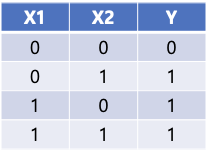
Boolean mask는 numpy 배열에서 조건에 맞는 True만 출력해주는 방법입니다. 

In [45]:
# Boolean mask 예시
a = np.array([1,2,3,4,5])
print(a > 3)
print(a[a > 3])
a[a > 3] = 0
print(a)

[False False False  True  True]
[4 5]
[1 2 3 0 0]


Boolean mask를 사용하여 OR gate 함수를 완성하시오.

In [7]:
# x를 넣으면 y의 결과는 [0,1,1,1]이 나와야 합니다.
def OR(x):
    w = np.array([0.5, 0.5])
    b = -0.4
    y = np.dot(x,w) + b
    y[ y <= 0] = 0
    y[ y > 0] = 1
    return y

In [8]:
OR(x)

array([0., 1., 1., 1.])

### XOR gate

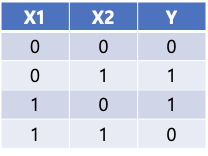 
```.T```는 행렬을 전치시켜주는 함수 입니다.

In [46]:
# .T 예시
a = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,9],
    [10,11,12]
])
a.T

array([[ 1,  4,  7, 10],
       [ 2,  5,  8, 11],
       [ 3,  6,  9, 12]])

위에서 만든 ```NAND()```, ```OR()```,```AND() ```를 활용하여 XOR gate를 구현하시오. 

In [9]:
# x를 넣으면 y의 결과는 [0,1,1,0]이 나와야 합니다.
def XOR(x):
    y1 = NAND(x)
    y2 = OR(x)
    y12 = np.array([y1,y2]).T
    return AND(y12)

In [10]:
XOR(x)

array([0., 1., 1., 0.])